# Sprawozdanie - 16 puzzle
Używane Heurystyki oraz Heurystyki częściowe:
- Manhattan Distance: Suma odległości każdego pola od jego miejsca docelowego
- Linear Conflict:
```text
|   |   |   |
| 5 | 3 | 4 |
|   |   |   |
```
 W przykładowej instancji chcielibyśmy przestawić 5 na swoje miejsce.
 Po drodze musimy minąć 4, które chcialoby z kolei przesunąć się w lewo. Jako że stoją na swojej drodze, to jedno z nich musi się usunąć z rzędu a następnie na niego wrócić. Zatem generuje nam się dodatkowy koszt w wielkości 2. Rozwinięcie tej własności na wszystkie rzędy i kolumny daje nam częściową heurystyke
 - Corner Tiles: W przypadku gdy mamy w rogu zablokowany klocek który w nim nie powinien być to musimy wykonac dodatkowe ruchy by go odblokować
 - Last Tile: Jako że ostatni ruch musi nam zamienić klocek w rogu z pustym, To oznacza, że w przedostatnim ruchu, w prawym dolnym rogu musi znajdować się 12 lub 15. Jeżeli się tam nie znajduje, to oznacza ze na pewno bedziemy musieli je tam wsadzić. Potrzebujemy na to conajmniej dwóch ruchów.
 
 ```text
|   |   |   | - |
|   |   | - | - |
|   |   | - |   |
|   |   |15 | 12|
```
```text
|   |   |   |   |
|   | - | - | - |
|   | - | - | 12|
|   | - |15 |   |
```

Testowane Heurystyki:
- ManhattanDistance = ManhattanDistance
- LinearConflict = Manhattan Distance + Linear Conflict
- ManhattanUpgraded = Manhattan Distance + Linear Conflict + Corner Tiles + Last Tile

In [1]:
import os
from dataclasses import dataclass
from collections import defaultdict
data = dict()

for i in range(1, 101):
    data[i] = {
        x: None for x in os.listdir("fast_analysis")
    }


for filename in os.listdir("fast_analysis"):
    filepath = os.path.join("fast_analysis", filename)
    
    with open(filepath) as file:
        lines = file.read().split("\n")[:-1]
    lines = lines[:-1]
    for line in lines:
        name, distance, visited, time_ = line.split(", ")
        data[int(name[5:])][filename] = visited

import json
#print(json.dumps(data, indent=4))
    

In [2]:
print("Skuteczność heurystyk")

occurrence = {
    x: 0 for x in os.listdir("fast_analysis")
}

for instance, dists in data.items():
    for test, value in dists.items():
        if value is not None:
            occurrence[test] += 1

print(json.dumps(occurrence, indent=4))

Skuteczność heurystyk
{
    "LinearConflicts": 99,
    "ManhattanUpgraded": 100,
    "ManhattanDistance": 73
}


Rozważmy tylko podzbiór rozwiązany przez każdą heurystyke


In [3]:
cleared_data = {}
for instance, dists in data.items():
    if None not in dists.values():
        cleared_data[instance] = dists
# print(json.dumps(cleared_data, indent=4))

In [4]:
print("Średnia ilości odwiedzonych stanów")

means = {
    x: 0 for x in os.listdir("fast_analysis")
}
amount = 0
for instance, dists in cleared_data.items():
    amount += 1
    for test, distance in dists.items():
        means[test] += int(distance)

for x in means:
    means[x] /= amount

print(json.dumps(means, indent=4))

print("Względnie:")
newmeans = {}
minimum = min(means.values())
for x in means:
    newmeans[x] = round(means[x] / minimum, 2)
    
print(json.dumps(newmeans, indent=4))

Średnia ilości odwiedzonych stanów
{
    "LinearConflicts": 365331.16438356164,
    "ManhattanUpgraded": 125705.46575342465,
    "ManhattanDistance": 1837691.6301369863
}
Względnie:
{
    "LinearConflicts": 2.91,
    "ManhattanUpgraded": 1.0,
    "ManhattanDistance": 14.62
}


In [5]:
plot_data = list(data.items())
myplotdata = {
    x: {"xs": [], "ys": []} for x in os.listdir("fast_analysis")
}

for instance, dists in plot_data:
    for heur, value in dists.items():
        if value is not None:
            myplotdata[heur]["xs"].append(int(instance))
            myplotdata[heur]["ys"].append(int(value))
            
# print(json.dumps(myplotdata, indent=4))
xs = list(data.keys())

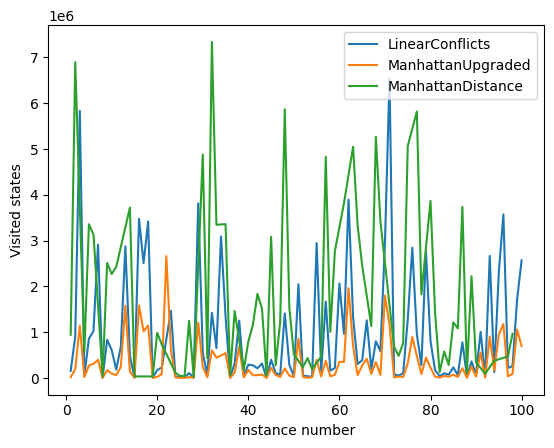

In [6]:
from matplotlib import pyplot as plt

for x, heurdata in myplotdata.items():
    plt.plot(heurdata["xs"], heurdata["ys"], label=x)
plt.legend()
plt.xlabel("instance number")
plt.ylabel("Visited states")

plt.show()

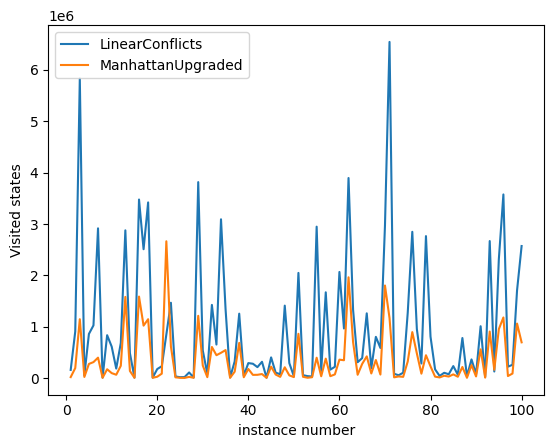

In [7]:
from matplotlib import pyplot as plt

for x, heurdata in myplotdata.items():
    if x != "ManhattanDistance":
        plt.plot(heurdata["xs"], heurdata["ys"], label=x)
plt.legend()
plt.xlabel("instance number")
plt.ylabel("Visited states")

plt.show()

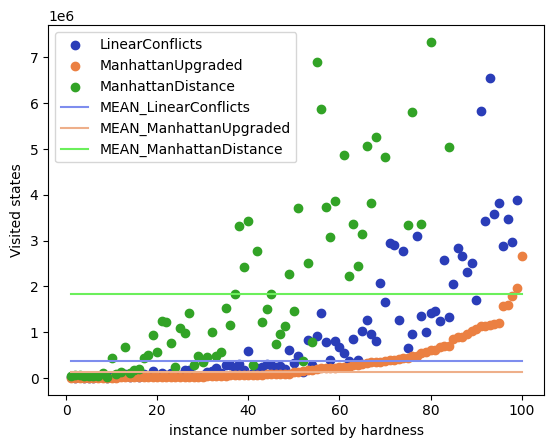

In [9]:
newdata = list(data.values())
newdata.sort(key=lambda x: int(x["ManhattanUpgraded"]))

newplotdata = {
    x: {"xs": [], "ys": []} for x in os.listdir("fast_analysis")
}

for i, dists in enumerate(newdata, start=1):
    for heur, val in dists.items():
        if val is not None:
            newplotdata[heur]["xs"].append(int(i))
            newplotdata[heur]["ys"].append(int(val))

colors = {
    'LinearConflicts':   ("#2A3DB8", "#7E8DEE"),
    'ManhattanUpgraded': ("#EB8042", "#EEAF8A"),
    'ManhattanDistance': ("#32A326", "#6BEF5B")
}
for x, heurdata in newplotdata.items():
    plt.scatter(heurdata["xs"], heurdata["ys"], label=x, color=colors[x][0], )
    
allxs = list(range(1, 101))
for heur, val in means.items():
    plt.plot(allxs, [val for _ in allxs], label=f"MEAN_{heur}", color=colors[heur][1])
    
plt.legend()
plt.xlabel("instance number sorted by hardness")
plt.ylabel("Visited states")

plt.show()